In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/bottle.csv")
df.head()

/var/folders/gh/tdqdcp611d5c7yv0b0np772c0000gn/T/ipykernel_45902/323703098.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/bottle.csv")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_vs = df[["T_degC", "Salnty", "STheta"]]
df_vs.dropna(inplace=True)
df_vs.describe()

/var/folders/gh/tdqdcp611d5c7yv0b0np772c0000gn/T/ipykernel_45902/3242782075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vs.dropna(inplace=True)


,T_degC,Salnty,STheta
count,812174.000000,812174.000000,812174.000000
mean,10.847904,33.842424,25.819394
std,4.221005,0.461567,1.167787
min,1.440000,28.431000,20.934000
25%,7.750000,33.490000,24.965000
50%,10.100000,33.869200,25.996000
75%,13.910000,34.198000,26.646000
max,31.140000,37.034000,250.784000


In [4]:
df_vs.corr()

,T_degC,Salnty,STheta
T_degC,1.000000,-0.504227,-0.829155
Salnty,-0.504227,1.000000,0.603470
STheta,-0.829155,0.603470,1.000000


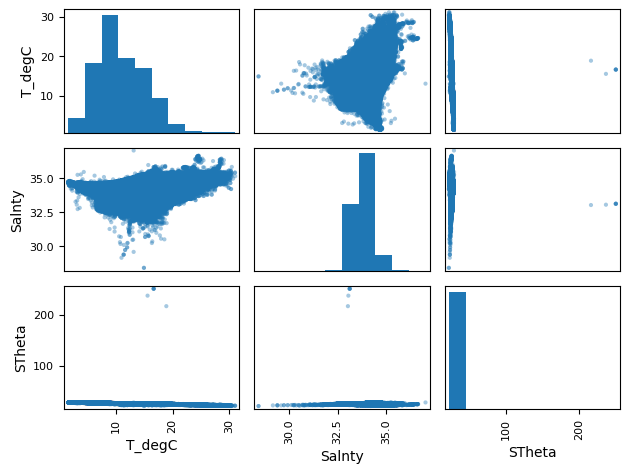

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_vs, alpha=0.4)
plt.tight_layout()

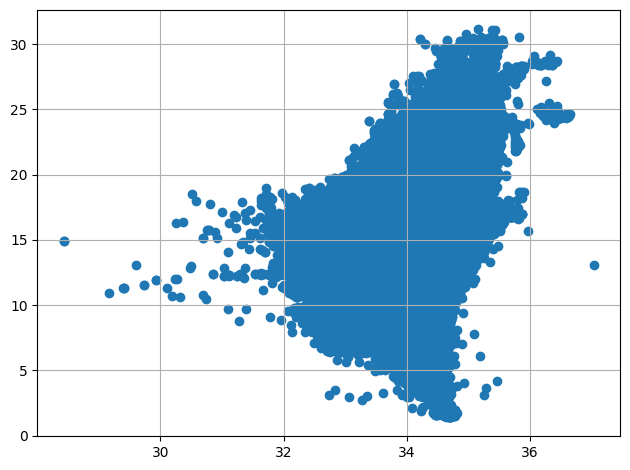

In [6]:
plt.scatter(df_vs["Salnty"], df_vs["T_degC"])
plt.tight_layout()
plt.grid(True)

### LR Based on Normal Equation
---

In [7]:
df_vs.insert(0, 'x0', np.ones(len(df_vs)))
df_vs.head()

,x0,T_degC,Salnty,STheta
0,1.0,10.50,33.440,25.649
1,1.0,10.46,33.440,25.656
2,1.0,10.46,33.437,25.654
3,1.0,10.45,33.420,25.643
4,1.0,10.45,33.421,25.643


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_vs[["x0", "Salnty", "STheta"]], 
                                                    df_vs[["T_degC"]], 
                                                    test_size=0.25, 
                                                    random_state=1)

In [9]:
## Normal Equation

In [14]:
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [15]:
theta_best

array([[93.62434634],
       [-0.27943706],
       [-2.83973484]])

## Using Sklearn
---

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [22]:
reg.intercept_, reg.coef_

(array([93.62434634]), array([[ 0.        , -0.27943706, -2.83973484]]))

In [23]:
y_pred = reg.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(y_test, y_pred)

4.524973073412697

In [30]:
reg.score(X_test, y_test)

0.7463167416014775